#Importing Libraries



In [64]:
import numpy as np
import pandas as pd
import seaborn as sns #to visalize data
import matplotlib.pyplot as plt # to visualize data
import sklearn.datasets #to enable loading of the dataset
from sklearn.model_selection import train_test_split #splits data into training and testing data
from sklearn.linear_model import LogisticRegression #imports the Logistic Regression machine learning model
from sklearn.metrics import accuracy_score #used to evaluate model performance by calculating the proportion of correct predictions out of the total number of predictions made

#Data Collection & Pre-Processing

In [65]:
#loading the data from sklearn (isplayed as a numpy array)
data = sklearn.datasets.load_breast_cancer()
#print(data)


# loading the data into a DataFrame
# Creates a Pandas DataFrame named 'breast_cancer_data' using the breast cancer dataset's data
# 'data.data' accesses the data portion of the dataset, representing the input features
# 'data.feature_names' contains the column names or feature labels for the dataset's columns
# Assigns these features to the 'columns' parameter to label the DataFrame columns accordingly
breast_cancer_data = pd.DataFrame(data.data, columns = data.feature_names)

breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
#adding the target colun to the data frame (the variable being predicted or estimated by a model)
breast_cancer_data["Diagnosis"] = data.target
breast_cancer_data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [67]:
#displying the number of missing values in each column
breast_cancer_data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diagnosis                  0
dtype: int64

#Exploratory Data Analysis

In [68]:
breast_cancer_data.shape # determines the dimensions of the DataFrame


(569, 31)

In [69]:
breast_cancer_data.describe() # to generate descriptive statistics of numerical columns within a DataFrame.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [70]:
#checking the distribution of the labels ( diagnosis column)
# 1 represents benign tumors whilst 0 represents malignant tumors
breast_cancer_data["Diagnosis"].value_counts()


1    357
0    212
Name: Diagnosis, dtype: int64

##Diagnosis Distribution Visualization

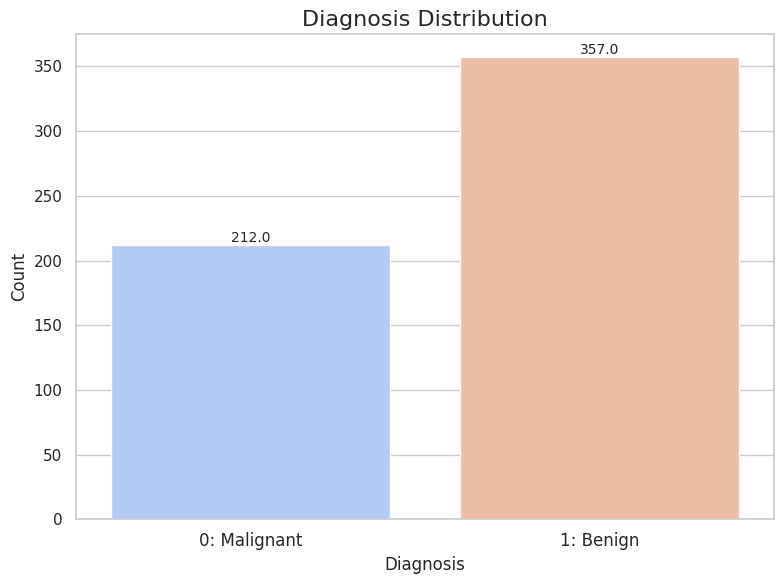

In [71]:

# Using a Seaborn color palette
custom_palette = sns.color_palette("coolwarm", 2)

# Creating the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x="Diagnosis", data=breast_cancer_data, palette=custom_palette)
ax.set_title('Diagnosis Distribution', fontsize=16)
ax.set_xlabel('Diagnosis', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Annotating each bar with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Set x-axis tick labels
ax.set_xticklabels(['0: Malignant', '1: Benign'], fontsize=12)

plt.tight_layout()
plt.show()


In [72]:
#average values for each label
breast_cancer_data.groupby("Diagnosis").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


###

#Fitting Machine Learning Model
###-Separating the features and target variable

In [73]:
# prompt: scikit-learn, separate the features and target variable and store them in the variables X and y respectively

X = breast_cancer_data.drop(columns= "Diagnosis", axis = 1)
Y = breast_cancer_data["Diagnosis"]

Y.tail(10)


559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: Diagnosis, dtype: int64

###-Splitting data into training and testing data

In [74]:
#Splitting the data into training and testing sets using the train_test_split() function from sklearn.model_selection
#The test_size parameter specifies the proportion of the data to be used for testing (20%),
# 80% of the data will be used for training and the remaining 20% for testing
#the random_state parameter ensures consistent results across different runs
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#Checking the shapes of the training and testing data sets
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)


Shape of training data: (455, 30)
Shape of testing data: (114, 30)


#Training The Model
### -> Using Logistic Regression

In [75]:
# prompt: using Logistic Regression, load an instance of the machine learning model into a variable called model and fit the data.

model = LogisticRegression(max_iter=2500)

# Now you can use logreg for training your model or making predictions

#The model learns to identify patterns or relationships between the input features and the target variable
model.fit(X_train, Y_train)


LogisticRegression(max_iter=2500)

#Model Evaluation
### -> Using Accuracy Score

In [76]:
# prompt: predict accuracy on training data

training_accuracy = accuracy_score(Y_train, model.predict(X_train))
print("Accuracy on training data:", training_accuracy)


Accuracy on training data: 0.9692307692307692


In [77]:
# prompt: Find the accuarcy using the test data

testing_accuracy = accuracy_score(Y_test, model.predict(X_test))
print("Accuracy on testing data:", testing_accuracy)


Accuracy on testing data: 0.9298245614035088


#Predicting Using User Input

In [ ]:
# Collecting user input
user_input = []  # Create an empty list to store user input

# Assuming the columns/features are the same as the dataset used for training
for feature in X.columns:
    # Take input for each feature from the user
    value = float(input(f"What is the {feature}: "))
    user_input.append(value)

# Converting user input into a NumPy array
user_input = np.array(user_input).reshape(1, -1)  # Reshape into a 2D array

# Making predictions based on user input
prediction = model.predict(user_input)
if prediction[0] == 1:
    print("Prediction: The tumor is classified as a Benign Tumor.")
    print("Although benign tumors are generally not life-threatening, they might still require medical attention depending on their size and location.")
    print("For more in-depth information, you might refer to reputable medical journals or articles such as those found in PubMed (www.ncbi.nlm.nih.gov/pmc) or search for articles by medical experts in oncology.")
else:
    print("Prediction: The tumor is classified as a Malignant Tumor.")
    print("Early detection and treatment are crucial for malignant tumors to prevent further complications.")
    print("For extensive research or scholarly articles, consider exploring databases like PubMed (www.ncbi.nlm.nih.gov/pmc) where numerous peer-reviewed articles on cancer research and treatment are available.")
